# Описание

Необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по [ссылке](https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv). 
На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб).

1. Обучите модель на необработанных данных и посчитайте метрику качества.
1. Проведите очистку данных.
1. Обучите модель на данных после обработки, посчитайте метрику качества.
1. Сравнить полученные результаты.

# Импорт библиотек

In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# установка отображения графиков в Jupyter Notebook
pio.renderers.default = "notebook"

# константы
RANDOM_STATE = 42

## Этап 1

### Загрузка данных

In [2]:

data = pd.read_csv("../data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Этап 2

### Удаление всех пропущенных значений и категориальных переменных

In [3]:
data_dropna = data.dropna()
data_dropna = data_dropna.select_dtypes(exclude=["object"])

### Обучение модели

In [4]:
X = data_dropna.drop(columns=["Survived"])
y = data_dropna["Survived"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

### Подсчет метрики качества

In [7]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy на необработанных данных (без пропусков и категориальных переменных): {accuracy:.4f}')
print(f'ROC AUC на необработанных данных (без пропусков и категориальных переменных): {roc_auc:.4f}')

Accuracy на необработанных данных (без пропусков и категориальных переменных): 0.7027
ROC AUC на необработанных данных (без пропусков и категориальных переменных): 0.8012


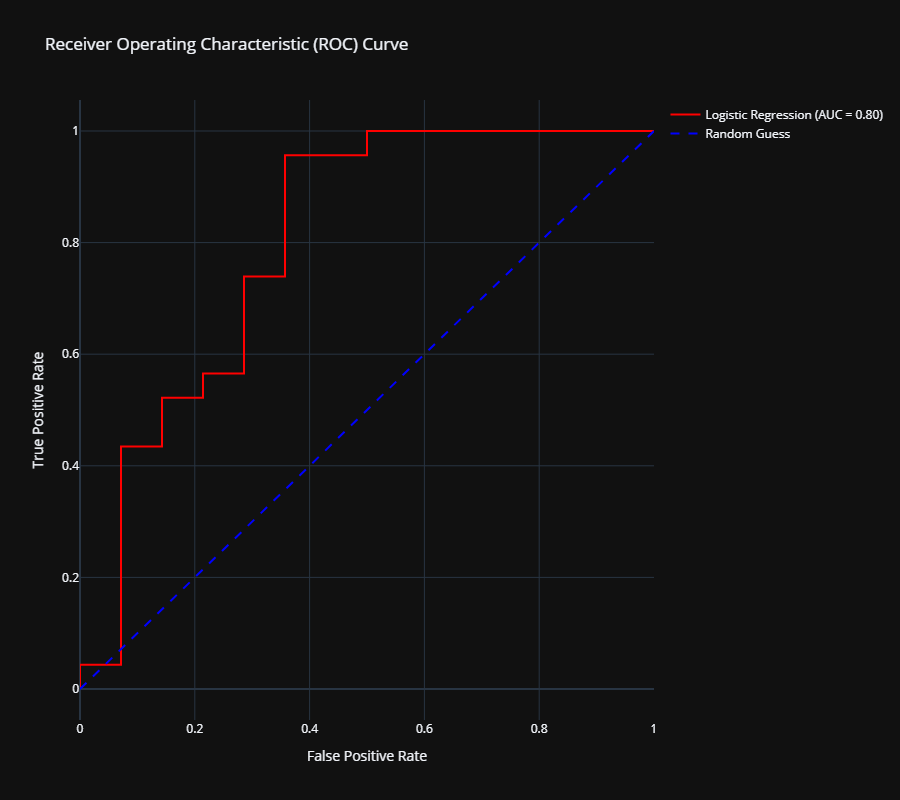

In [8]:
def plot_roc_curve(y_test, y_pred_prob, model_name="Logistic Regression", template="plotly_dark", height=800, width=900):
    """
    Функция для построения ROC-кривой с использованием Plotly.
    
    :param y_test: Вектор истинных значений.
    :param y_pred_prob: Вектор предсказанных вероятностей положительного класса.
    :param model_name: Название модели (для легенды на графике).
    :param template: Шаблон оформления графика.
    :param height: Высота графика.
    :param width: Ширина графика.
    """
    
    # Расчет FPR, TPR и порогов
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Расчет AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Создание фигуры
    fig = go.Figure()

    # Добавление кривой модели
    fig.add_trace(
        go.Scatter(
            x=fpr,
            y=tpr,
            mode="lines",
            name=f"{model_name} (AUC = {roc_auc:.2f})",
            line=dict(color="red"),
        )
    )

    # Добавление линии случайного угадывания
    fig.add_trace(
        go.Scatter(
            x=[0, 1],
            y=[0, 1],
            mode="lines",
            name="Random Guess",
            line=dict(color="blue", dash="dash"),
        )
    )

    # Настройка оформления графика
    fig.update_layout(
        title="Receiver Operating Characteristic (ROC) Curve",
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        showlegend=True,
        height=height,
        width=width,
        template=template,
    )

    # Отображение графика
    fig.show("png")

plot_roc_curve(y_test, y_pred_prob)

## Этап 3

### Повторная загрузка данных

In [9]:
# data = pd.read_csv("../data/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Этап 4

### Удаление признаков, которые логически не нужны для построения модели

Эти признаки не влияют на выживание и могут содержать много уникальных значений или пропусков

In [10]:
data.drop(
    columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True
)

## Этап 5

### Проверка данных на наличие пропущенных значений

In [11]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Подсчет процента утерянных данных, при удалении пропусков

In [12]:
missing_data = data.isnull().sum()
missing_data_percent = (missing_data / len(data)) * 100
print(f"Процент пропущенных данных:\n{missing_data_percent}")

Процент пропущенных данных:
Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64


### Заполнение пропусков c использованием подходящих методов

Возраст - mean

In [13]:
imputer_mean = SimpleImputer(strategy="mean")
data["Age"] = imputer_mean.fit_transform(data[["Age"]])

Категориальные принаки - fillna

In [14]:
data.fillna({"Embarked": "Missing"}, inplace=True)

## Этап 6

### Конвертация категориальных признаков в числовые

In [15]:
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data = pd.get_dummies(data, columns=["Embarked"], drop_first=True)

## Этап 7

### Проверка данных на наличие выбросов

In [16]:
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
Q1 = data[numeric_features].quantile(0.25)
Q3 = data[numeric_features].quantile(0.75)
IQR = Q3 - Q1

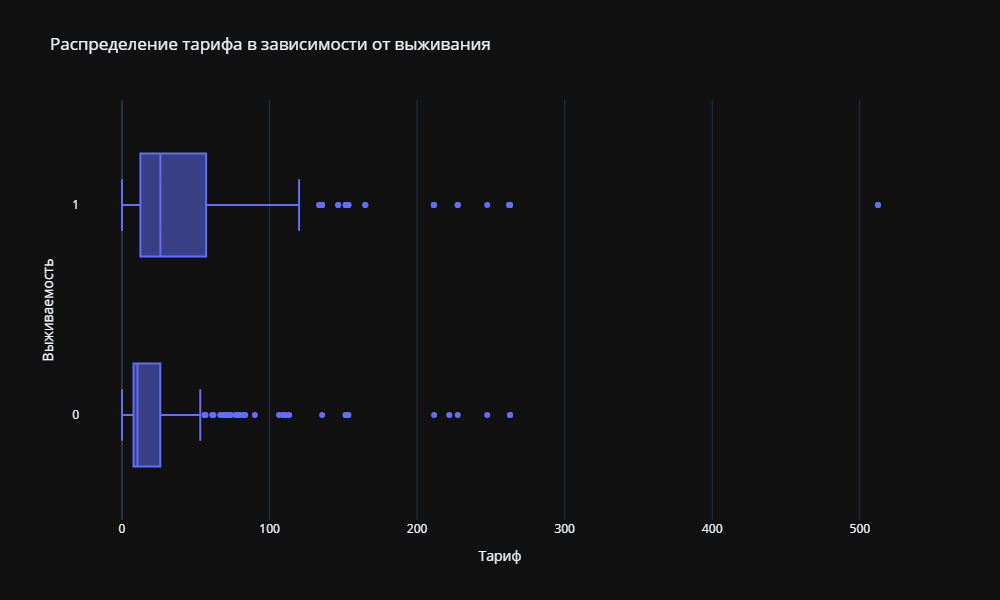

In [17]:
def plot_horizontal_box(
    data,
    x_col,
    y_col,
    title,
    labels=None,
    height=600,
    width=1000,
    template="plotly_dark",
):
    """
    Функция для построения горизонтального боксплота.

    :param data: DataFrame с данными для графика.
    :param x_col: Название колонки для оси X.
    :param y_col: Название колонки для оси Y.
    :param title: Заголовок графика.
    :param labels: Словарь для переименования меток осей.
    :param height: Высота графика.
    :param width: Ширина графика.
    :param template: Шаблон оформления графика.
    """

    fig = px.box(
        data,
        x=x_col,
        y=y_col,
        orientation="h",
        title=title,
        labels=labels,
        height=height,
        width=width,
        template=template,
    )

    fig.show("png")


plot_horizontal_box(
    data,
    x_col="Fare",
    y_col="Survived",
    title="Распределение тарифа в зависимости от выживания",
    labels={"Survived": "Выживаемость", "Fare": "Тариф"},
)

### Удаление выбросов

In [18]:
data = data[
    ~(
        (data[numeric_features] < (Q1 - 1.5 * IQR))
        | (data[numeric_features] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]

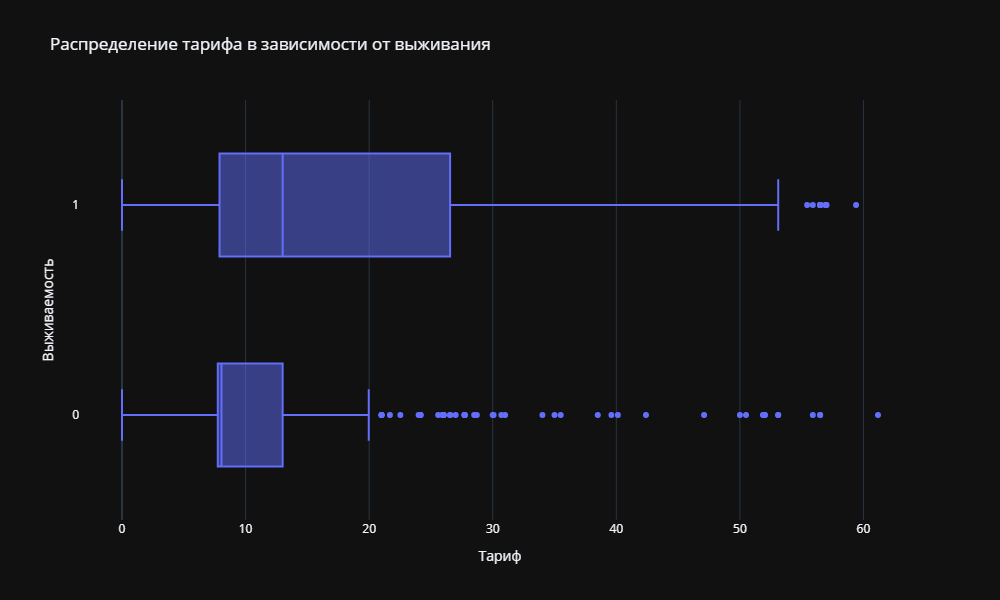

In [19]:
plot_horizontal_box(
    data,
    x_col="Fare",
    y_col="Survived",
    title="Распределение тарифа в зависимости от выживания",
    labels={"Survived": "Выживаемость", "Fare": "Тариф"},
)

Логистическая регрессия, как и многие другие модели машинного обучения, предполагает определённое распределение данных и их зависимость от признаков. Выбросы могут искажать зависимость между признаками и целевой переменной (в данном случае — выживание), что может привести к ошибочным заключениям и плохому качеству предсказаний.

## Этап 8

### График зависимости возраста и выживания

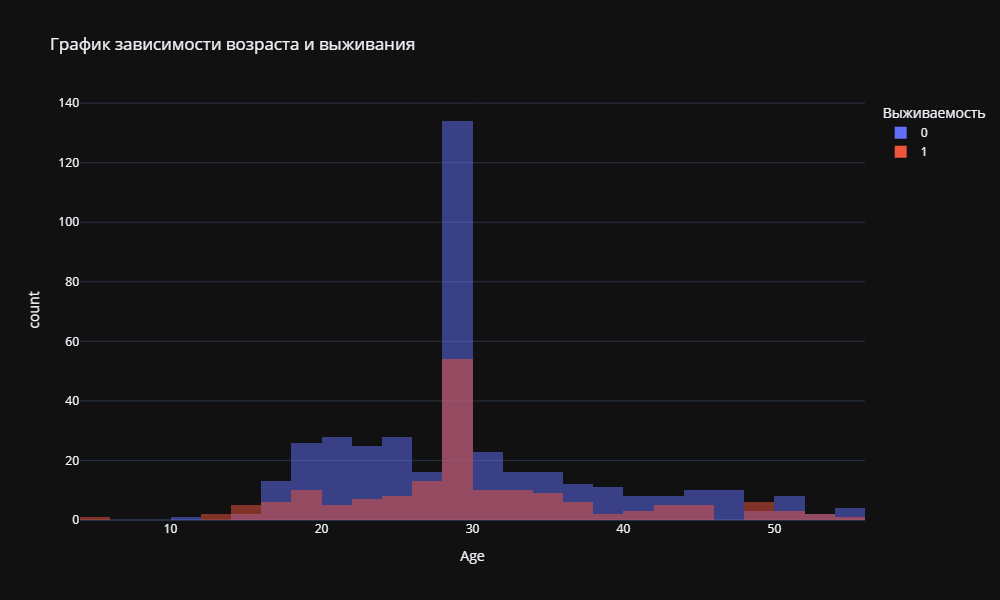

In [20]:
# : Построение графиков
fig_age = px.histogram(
    data,
    x="Age",
    color="Survived",
    barmode="overlay",
    title="График зависимости возраста и выживания",
    labels={"Survived": "Выживаемость"},
    height=600,
    width=1000,
    template="plotly_dark",
)

# Отображение графика
fig_age.show("png")

## Этап 9

### Математическое преобразование признака Age (Нормализация)

In [21]:
data["Age"] = (data["Age"] - data["Age"].min()) / (
    data["Age"].max() - data["Age"].min()
)

## Этап 10

### Обучение модели на преобразованных данных 

In [22]:
X = data.drop(columns=["Survived"])
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

accuracy_processed = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy на обработанных данных: {accuracy_processed:.4f}')
print(f'ROC AUC на обработанных данных: {roc_auc:.4f}')

Accuracy на обработанных данных: 0.8190
ROC AUC на обработанных данных: 0.8341


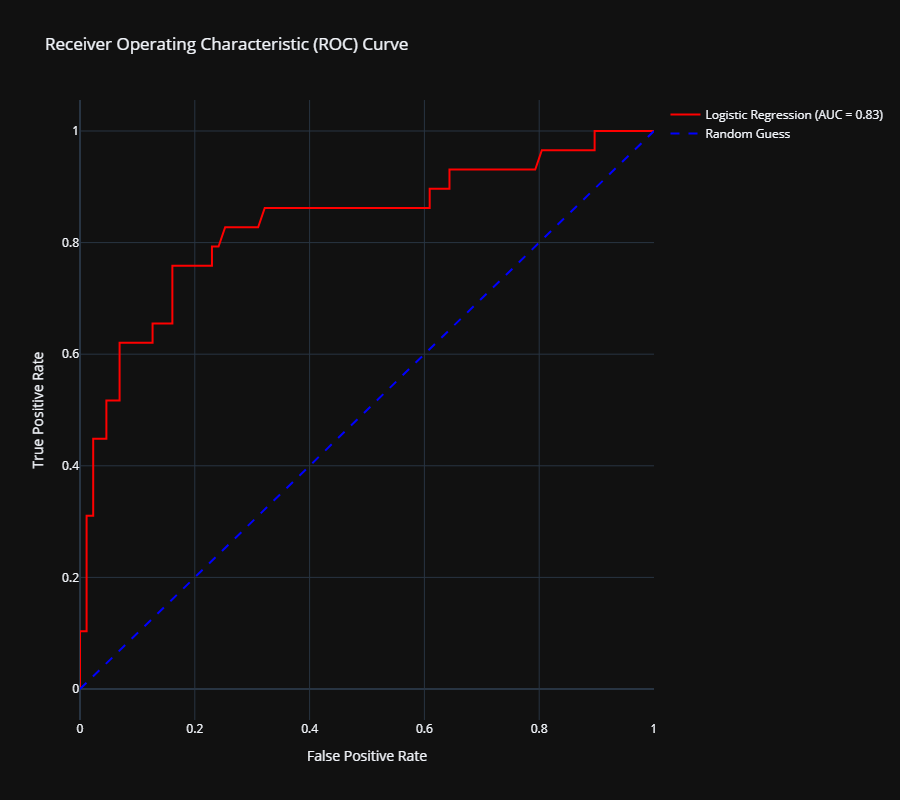

In [24]:
plot_roc_curve(y_test, y_pred_prob)

# Вывод

**a) Преобразования:**

- Удалены признаки: PassengerId, Name, Ticket, Cabin
- Заполнены пропуски в признаках Age (средним значением) и Embarked (константой)
- Категориальные переменные преобразованы в числовые значения
- Удалены выбросы с помощью метода IQR
- Признак Age нормализован

**b) Сравнение метрик:**

- Accuracy на необработанных данных: 0.7027
- Accuracy на обработанных данных: 0.8190

**c) Мнение о целесообразности работы с данными:**

Обработка данных и их очистка являются важной частью построения моделей машинного обучения. На данном примере видно, что обработанные данные могут существенно улучшить качество модели.
Даже если исходные данные имеют много пропусков или выбросов, их правильная обработка позволяет модели лучше понимать взаимосвязи в данных, что в конечном счете повышает точность предсказаний.


Для действительно больших данных подход должен быть более гибким и автоматизированным, чтобы обработка данных занимала минимальное время и ресурсы.